In [1]:
%matplotlib inline
from qiskit import *
import matplotlib
import matplotlib.pyplot as plt
from qiskit.extensions.standard import *
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

<h1 align="center">
	Larmor Precession On A Quantum Computer Simulator
</h1>

I used QISKit provided local backend "Qasm Simulator" for the simulator type.

* What you will be learning:

1- The behavior of a spin 1/2 particle subjected to an external magnetic field.

2- the Larmor Precession quantum phenomenon.

3- How a quantum computer can simulate this natural phenomenon.

4- How to implement a Hamiltonian's time evolution on a Quantum circuit.

## - Larmor Precession theory:

The magnetic field, in general, can be pointing in any direction in 3D space $\vec B = B_x \vec i + B_y \vec j + B_z \vec z \;$. Also, the spin 1/2 particle, have a spin angular momentum pointing in the 3D space $\vec S = S_x \vec i + S_y \vec j + S_z \vec z \;$, and since he acts like spinning, he has a magnetic dipole $\vec \mu$ .

Suppose an electron $e^-$, with angular momentum $\vec S$, and a magnetic dipole $\vec \mu$, exposed to a uniform magnetic field $\vec B$, in this experiment we will consider the special case where $\vec B$ point in the z-direction, thus $\vec B = B \vec z$. fig_1 [[4](https://www.researchgate.net/publication/321878551_Hyperpolarized_Long-Lived_States_in_Monodeuterated_Methyl_Groups_Singlet-Scalar_Relaxation_in_the_Regime_of_Slow_Quadrupolar_Relaxation/citations)]
<img src="Precession-cones.png" alt="drawing" width="300"/>
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad figure1$

To see how the spin 1/2 interact with $\vec B\;$, we need to find the Hamiltonian $H$ of the system:
* Since the $e^-$ is at rest, the kinetic energy part of $H$ will be zero, therefore he will be given by the potential energy, which is:
$$H = V = -\vec \mu \cdot \vec B$$
* We are interested in the evolution of the orientation of the electron spin; therefore $H$ must be expressed in term of the spin rather than the magnetic moment, given that $\vec \mu = -\gamma \vec S$ , $\gamma \;is\;the\;gyromagnetic\;ratio$ , hence:
$$H = -\gamma \vec S \cdot \vec B$$
the spin observable in the z-direction is: $S_z = \frac{\hbar}{2} \sigma_z$ , $\sigma_z :\;is\;the\;pauli's\;matrix$.

$\Rightarrow$ $$\begin{align*}
H&=-\gamma B S_z \\
&=- \frac{\gamma \hbar B}{2} \sigma_z \\
&=- \frac{\gamma \hbar B}{2} \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
\end{align*}$$
* This Hamiltonian is proportional to $S_z$, consequently, he commutes with $S_z$, $[S_z, S_z]=0$ and $S^2$, $[S_z, S^2]=0$, then the eigenstates of $H$ are the ones of $S_z$:

$\Rightarrow$ $$\begin{align*}
H \left| \uparrow \right\rangle& = E_-\left| \uparrow \right\rangle =- \frac{\gamma \hbar B}{2}\left| \uparrow \right\rangle\\
H \left| \downarrow \right\rangle&= E_+\left| \downarrow \right\rangle = \frac{\gamma \hbar B}{2}\left| \downarrow \right\rangle
\end{align*}$$

The lowest eigenvalue is associated with spin up, or parallel alignment with the field.
* To see how the electron behaves under this Hamiltonian, we need to solve the Schrodinger equation:

$$ i \hbar \partial_t \left| \psi(t) \right\rangle = H \left| \psi(t) \right\rangle \qquad (1)$$

To do that, first of all, we need to set up (or choose) our initial state vector of the $e^-$ at $t=0$; in general, any state (or qubit) can be expressed in the Bloch sphere fig_2 as:

$$ \left| \psi \right\rangle = \cos(\frac{\theta}{2}) \left| \uparrow \right\rangle + e^{i\phi} \sin(\frac{\theta}{2}) \left| \downarrow \right\rangle$$

<img src="wiki_Bloch_Sphere.png" alt="drawing" width="300"/>
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad figure2\;/\;image\;credit: wikipedia$

$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\; \left| 0 \right\rangle$ and $\left| 1 \right\rangle$ being $\left| \uparrow \right\rangle$ and $\left| \downarrow \right\rangle$ respectively.

Back to $(1)$, $H$ is time-independent, thus the general solution to the time-dependent Schrodinger equation is:
$$ \left| \psi(t) \right\rangle = U(t) \left| \psi(0) \right\rangle$$

where $ U(t) = \sum_{i}^{} e^\frac{-i E_i t}{\hbar} \left| E_i \right\rangle \left\langle E_i \right| \;$, $\qquad \left| E_i \right\rangle$ are $\left| \uparrow \right\rangle\; or \left| \downarrow \right\rangle$  is the time evolution operator, it follows that:

$\Rightarrow$ $$\left| \psi(t) \right\rangle = e^{i\frac{\gamma B}{\hbar}t} \cos(\frac{\theta}{2})\left| \uparrow \right\rangle + e^{-i\frac{\gamma B}{\hbar}t} e^{i\phi} \sin(\frac{\theta}{2})\left| \downarrow \right\rangle$$

To recognize the resulting state, it is convenient to factor out the phase that multiply the $\left| \uparrow \right\rangle$ state:
$$\left| \psi(t) \right\rangle = e^{i\frac{\gamma B}{2}t} (\cos(\frac{\theta}{2})\left| \uparrow \right\rangle + e^{i(\phi - \gamma B t)} \sin(\frac{\theta}{2})\left| \downarrow \right\rangle)$$

By ignoring the overall phase $e^{i\frac{\gamma B}{2}t}$, we can recognize the spin state through the angles:
$$\begin{align*}
\theta (t)&= \theta\\
\phi (t)&= \phi - \gamma B t
\end{align*}$$

$\rightarrow\;$ As we can see the angle $\phi$ change as a function of time, while $\theta$ remains constant in time, therefore the presence of a uniform magnetic field B, leads the $e^-$ spin to start precessing around the z-axis! this is called the **Larmor Precession** fig_1 (shows the precession of different angle $\theta$ ), Also its precess at a certain rate $\omega = - \gamma B$, this is called the **Larmor Frequency**.

* Let us now get the expression for the time evolution of the x, y, z components of the spin angular momentum: $\left\langle S_x \right\rangle$?, $\left\langle S_y \right\rangle$?,$\left\langle S_z \right\rangle$?

We end up with: $\left| \psi(t) \right\rangle = \cos(\frac{\theta}{2})\left| \uparrow \right\rangle +  e^{i \omega t} \sin(\frac{\theta}{2})\left| \downarrow \right\rangle = \begin{pmatrix} \cos(\frac{\theta}{2}) \\ e^{i \omega t} \sin(\frac{\theta}{2}) \end{pmatrix} \;$, so:

$$\left\langle S_z \right\rangle = \left\langle \psi \right| S_z \left| \psi \right\rangle = \frac{\hbar}{2} \left( \cos(\frac{\theta}{2}) \;\;\;\;  e^{-i \omega t} \sin(\frac{\theta}{2}) \right) \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} \cos(\frac{\theta}{2}) \\ e^{i \omega t} \sin(\frac{\theta}{2}) \end{pmatrix} = \frac{\hbar}{2} \cos(\theta)$$

$\rightarrow\;$ This expectation value is time-independent, this is trivial since $\theta = cst$, hence the projection of $\left\langle S_z \right\rangle$ along the z-axis still unchangeable fig_3 [[1](http://depts.washington.edu/jrphys/ph315W08/spinmag.pdf)]

By identical calculation for $\left\langle S_x \right\rangle$ and $\left\langle S_y \right\rangle$, we obtain:
$$\begin{align*}
\left\langle S_y \right\rangle&= \frac{\hbar}{2} \sin(\theta) \cos(\phi + \omega t)\\
\left\langle S_x \right\rangle&= \frac{\hbar}{2} \sin(\theta) \sin(\phi + \omega t)
\end{align*}$$
$\rightarrow\;$The difference between the two is just a rotation in the (x,y) plane, and they are both oscillating in time.

**These equations define a vector that points towards a circle of radius $\frac{\hbar}{2} \sin(\theta)\;$ and goes around the circle with frequency $\omega =\left\lvert{\gamma}\right\rvert B\;$,  [[3](https://www.reed.edu/physics/courses/Physics342/html/page2/files/Lecture.26.pdf)] , fig_3** 

<img src="expec.precession.png" alt="drawing" width="300"/>
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad figure3$

$\Rightarrow$ To sum up, electrons have a property called a "spin" which results in an angular momentum. Since the electron is charged, a magnetic moment is associated with the angular momentum which points the angular momentum vector in the opposite direction $\vec \mu = -\gamma \vec S$ . In an external magnetic field the spin precesses at the Larmor frequency along the field direction at the Larmor frequency and thus a component of the magnetic moment is either parallel or anti-parallel to the field direction.

## Larmor precession on a QC:

* **To visualize how this expectation value varies, let us simulate this phenomenon on a quantum computer simulator-- a simulated runs of real quantum computers, represent the same operations performed without decoherence or errors.**

* Define the universal gates:

The relevant single-qubit operations implementable by the IBM quantum computer are:

$$
U_1(\lambda) = \begin{pmatrix}
1 & 0 \\
0 & e^{i \lambda}
\end{pmatrix},
\qquad
U_2(\lambda , \phi) =\frac{1}{\sqrt2} \begin{pmatrix}
1 & -e^{i \lambda}\\
e^{i \phi} & e^{i (\lambda + \phi)}
\end{pmatrix},
\qquad
U_3(\theta,\phi,\lambda) = \begin{pmatrix}
\cos(\frac{\theta}{2}) & -e^{i \lambda} \sin(\frac{\theta}{2})\\
e^{i \phi} \sin(\frac{\theta}{2}) & e^{i (\lambda + \phi)} \cos(\frac{\theta}{2})
\end{pmatrix}.
$$

where $\lambda$, $\phi$ and $\theta$ are free real parameters that can be adjusted in accordance with the gate to be implemented [[2](http://www.scielo.br/pdf/rbef/v42/1806-9126-RBEF-42-e20190299.pdf)]

The initial state $\left| \psi(0) \right\rangle$ can be prepared using the unitary $U_3(\theta) = \begin{pmatrix} \cos(\frac{\theta}{2}) & -\sin(\frac{\theta}{2}) \\ \sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2}) \end{pmatrix}$ acting on $\left| 0 \right\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$

1- Let's start our start, with preparing our qubit with the state $\left| \psi(0) \right\rangle$  by doing a rotation of $\frac{\pi}{4}$ around the $Y$ axis- this is done by the $R_y(\frac{\pi}{4}) $ gate in the code below. fig_4

<img src="pi4.bloch.sphere.png" alt="drawing" width="300"/>
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad figure4$

2- Simulate the time evolution operator: the evolution of this state under a magnetic field $B$ is guaranteed by the operation of $U(t)= e^{i \frac{\omega t}{\hbar}\sigma_z}$, this can be implemented in the quantum circuit through the $U_1(\lambda)$ gate, setting $\lambda = \omega t\;$ fig_5, **this gate enable us to simulate the application of the uniform magnetic field, so according to $U_1(\lambda)$ the field is just a rotation around the z-axis with a variable angle $\omega t$ in the Bloch sphere**.

The measurements of the expectation values are done on the x-, y-, z-axis to measure $\left\langle S_x \right\rangle$, $\left\langle S_y \right\rangle$,$\left\langle S_z \right\rangle$ respectively, however quantum computers are restricted only to measure on the computational basis $\left| 0 \right\rangle \equiv \left| \uparrow \right\rangle$ and $\left| 1 \right\rangle \equiv \left| \downarrow \right\rangle$, so we need to follow some steps to measure our quantities safely, **see a detailed explanation [here](https://github.com/walid-mk/VQE/blob/master/Task4/VQE.Noiseless.Simulator.Code1.ipynb).**

3- The measurement: to measure the z-spin component we don't need to implement a rotation. On the other hand, the spin measurement along x-axis we apply a Hadamard gate $U_2(0,\pi)$, and for the y-axis we apply a rotation around the x-axis in the Bloch sphere $R_x(\pi/2$) with the universal gate is implemented as $U_2(0, \frac{\pi}{2})$, see the operators below. fig_5 [[2](http://www.scielo.br/pdf/rbef/v42/1806-9126-RBEF-42-e20190299.pdf)]

<img src="measurement.png" alt="drawing" width="300"/>
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad figure5$

$\rightarrow\;$ The encircled box in fig_5 represents a measurement on computational basis and provides probabilities {$P_0^{x,y,z}, P_1^{x,y,z}$} of finding the states $\left| 0 \right\rangle$ and $\left| 1 \right\rangle$. Therefore the expectation values can be computed as:
$$\left\langle S_{x,y,z} \right\rangle = \frac{\hbar}{2} [P_0^{x,y,z}(\omega t) - P_1^{x,y,z}(\omega t)]$$

In [2]:
H_gate = U2Gate(0, np.pi).to_matrix()
Rx_gate = U2Gate(0, np.pi/2).to_matrix()
print("Hadamard gate:")
print((H_gate * np.sqrt(2)).round(5))
print("Rx gate:")
print((Rx_gate * np.sqrt(2)).round(5))

Hadamard gate:
[[ 1.+0.j  1.-0.j]
 [ 1.+0.j -1.+0.j]]
Rx gate:
[[ 1.+0.j -0.-1.j]
 [ 1.+0.j  0.+1.j]]


In [3]:
# Define a function that we will use to get the probability from the counts returned after execution:
#the numbers of shots per value of b
shots = 1000
def get_from(d: dict, key: str):

    value = 0
    if key in d:
        value = d[key]
    return value/shots

In [4]:
def probability(circuit, measure):
    # initialize liste to extract value added from the measurement to plot it
    pr_0 = [] # list that will hold results of the probility of getting 0 after 1000 shots
    pr_1 = [] # probility of getting 1
    expc = [] # the expectation value pr_0 - pr_1
    T = [] # the values of time
    
    # implement the for function, which play the role of the time generator 
    for t in range(25):
        q = QuantumRegister(1)
        c = ClassicalRegister(1)
        circuit = QuantumCircuit(q, c) # create a circuit called qc, with 1 qubit, and 1 bit of output
        
        # initialization of the state psi(t=0)
        circuit.ry(np.pi/4,0)
        #circuit.h(0)
        
        # time-evolution-hamiltonian, this implementation translate the evolution of the system in a 
        # magnetic field.
        circuit.rz(t,0) # apply an ry gate for an angle of t to the qubit.
        
        # the measurement process
        if measure == 'Z':
            circuit.measure(q[0], c[0]) # extract a bit from the qubit, and write it to our output bit.
        elif measure == 'X':
            circuit.u2(0, np.pi, q[0])
            circuit.measure(q[0], c[0])
        elif measure == 'Y':
            circuit.u2(0, np.pi/2, q[0])
            circuit.measure(q[0], c[0])
    
        simulator = Aer.get_backend('qasm_simulator') # our quantum computer qasm simulator.
        # I'm fixing the number of seed for random number generator to have a fixed result of probability, 
        # without having different ones after each run, hence an ideal simulator.
        job = execute(circuit, backend=simulator, shots=shots, seed_simulator=12345)
        result = job.result()
        counts = result.get_counts()
        
        pr_0.append(get_from(counts, '0'))
        pr_1.append(get_from(counts, '1'))
        expc.append(get_from(counts, '0')- get_from(counts, '1')) # pr_0 - pr_1
        T.append(t)
        
    return pr_0, pr_1, expc, T

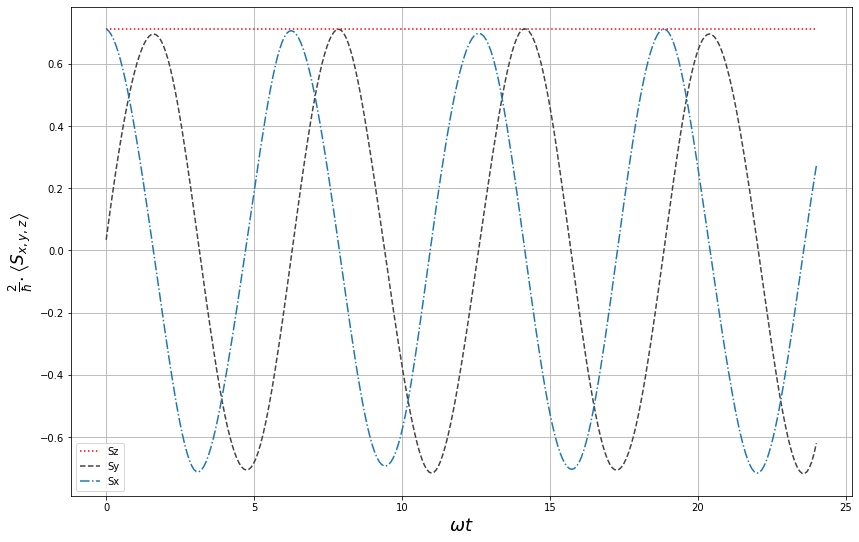

In [5]:
# use some matplotlib and scipy functions to get a nice and smouth lines
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot()

t = np.array(probability(circuit,'Z')[3])
T_smooth = np.linspace(t.min(),t.max(),300)
splz = make_interp_spline(t, probability(circuit,'Z')[2], k=3)
sply = make_interp_spline(t, probability(circuit,'Y')[2], k=3)
splx = make_interp_spline(t, probability(circuit,'X')[2], k=3)
expcz_smooth = splz(T_smooth)
expcy_smooth = sply(T_smooth)
expcx_smooth = splx(T_smooth)

ax.plot(T_smooth, expcz_smooth, color='red',linestyle=':', label='Sz')
ax.plot(T_smooth, expcy_smooth, color='#444444',linestyle='--', label='Sy')
ax.plot(T_smooth, expcx_smooth, linestyle='-.', label='Sx')

plt.xlabel(r'$\omega t$',
           {'color': 'black', 'fontsize': 18})
plt.ylabel(r'$\frac{2}{\hbar} . \left\langle S_{x,y,z} \right\rangle\;$',
           {'color': 'black', 'fontsize': 17})
plt.legend()
plt.grid()
plt.show()

**As we can see the $\left\langle S_z \right\rangle$ represents a straight line - a constant value, whereas $\left\langle S_{x,y} \right\rangle$ are oscillating and shifted with a phase which I mentioned above as a rotation.**

What we are seeing, is the measurement for each value of $\omega t$ was repeated $1000$ times, that represents a point in the line.

$\rightarrow\;$Finally, we succeeded to simulate the  Larmor precession using a quantum computer simulator, in this paper, [[2](http://www.scielo.br/pdf/rbef/v42/1806-9126-RBEF-42-e20190299.pdf)] they used a real quantum computer IBM five qubit chip to run this experiment.

* To get more intuition about this precession, let's think about how to get the state $0$ and $1$ while time shifts, to do that, try to visualize how the projection of the state vector on the (x,y) plane will vary with time in the Bloch sphere; the precession is along the z-axis, hence the projection on that axis is constant. Whereas the projection on the x-,y-axis will shift in time, it therefore begins with a high probability of being in state $1$ and incrementally decreasing allowing for an increase in state $0$. fig_6

<img src="projection.bloch.png" alt="drawing" width="400"/>
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad figure6$

**The code below, follow the x-axis projection variance, and you can choose the y- and z-axis to measure and make conclusions:**

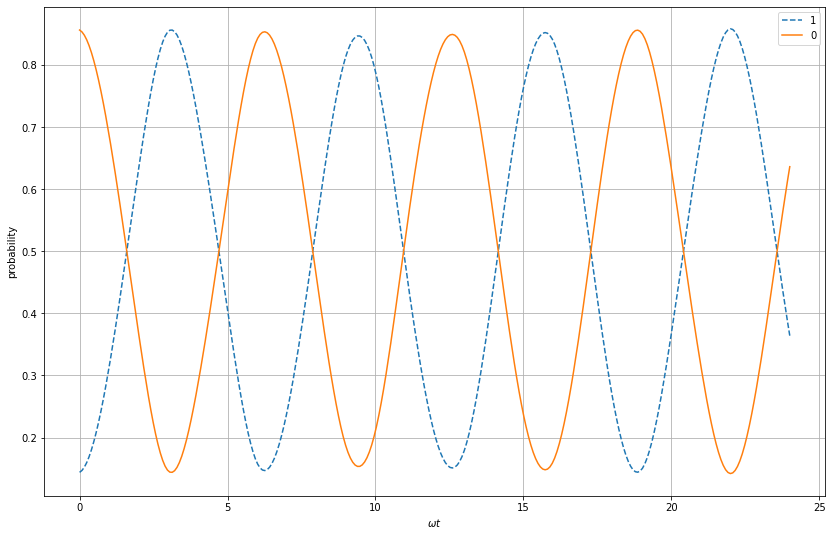

In [6]:
# plotting the probability oscillation along the x-axis
fig = plt.figure(figsize=(14, 9))
ax1 = fig.add_subplot()


t = np.array(probability(circuit,'Z')[3])
T_smooth = np.linspace(t.min(),t.max(),300)
spl1 = make_interp_spline(t, probability(circuit,'X')[0], k=3)
spl2 = make_interp_spline(t, probability(circuit,'X')[1], k=3)
proba1_smooth = spl2(T_smooth)
proba0_smooth = spl1(T_smooth)

ax1.plot(T_smooth, proba1_smooth, linestyle='--', label='1')
ax1.plot(T_smooth, proba0_smooth, label='0')

plt.xlabel(r'$\omega t$')
plt.ylabel('probability')
plt.legend()
plt.grid()
plt.show()

$\rightarrow\;$ **As you can see, we achieved what we expected, the probability being in the state $0$ is higher ($=$  $100 \% \;$), this is obvious since our state is prepared closer to the $0$ state of the x-axis, and with time the state vector gradually approach the $1$ state and so an. this alternation in between creates an oscillation as shown above.**

* **The preparation of the state is arbitrary, you can choose one by playing with the code, and deduce a conclusion by reading the plot result. For instance, this is another try, by establishing the state on the x-axis by applying a Hadamard gate on $\left| 0 \right\rangle$ state vector, and this what I got:**

<img src="hadamard.png" alt="drawing" width="700"/>

* **This experiment can also be done with two qubits (think of it as two Bloch sphere on a uniform magnetic field), depending on where you initialize your state you get an oscillation of two-state ($\left| 00 \right\rangle$ and $\left| 11 \right\rangle$, or $\left| 01 \right\rangle$ and $\left| 10 \right\rangle$ ...), for example, preparing the first qubit with a Hadamard and the second with a Hadamard + Z gate(a $\pi$ rotation around the z-axis) I got an oscillation of the state $\left| 01 \right\rangle$ and $\left| 10 \right\rangle$:**

<img src="two.qubits.png" alt="drawing" width="700"/>

<h1 align="center">
	Reffrences
</h1>


[1] [Evolution of a spin 1/2 particle in a uniform magnetic field from Cohen-Tannoudji](http://depts.washington.edu/jrphys/ph315W08/spinmag.pdf)

[2] [Émerson M Alves, Francisco D S Gomes et al. Revista Brasileira de Ensino de Física, 42, 2020](http://www.scielo.br/pdf/rbef/v42/1806-9126-RBEF-42-e20190299.pdf).

[3] [Addition of Angular Momentum](https://www.reed.edu/physics/courses/Physics342/html/page2/files/Lecture.26.pdf)

[4] [Stuart J. Elliott 2017 Hyperpolarized Long-Lived States in Monodeuterated Methyl Groups & Singlet-Scalar Relaxation in the Regime of Slow Quadrupolar Relaxation ResearchGate](https://www.researchgate.net/publication/321878551_Hyperpolarized_Long-Lived_States_in_Monodeuterated_Methyl_Groups_Singlet-Scalar_Relaxation_in_the_Regime_of_Slow_Quadrupolar_Relaxation/citations)